<a href="https://colab.research.google.com/github/Pareidollya/ProphetOcorrenciasCriminais/blob/main/ANALISE_TEMPORAL_OCORRENCIAS_CRIMINAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DUPLA:
* JOÃO PEDRO NIMUENDAJU SANTANA SANTOS
* JOSÉ DAVI CORREIA PASSOS

#OCORRÊNCIAS CRIMINAIS - SERIES TEMPORAIS

https://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica




In [ ]:
# Imports do Python
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from dateutil import parser

# Imports do Colab
from google.colab import drive

%matplotlib inline

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo,loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

In [ ]:
drive.mount('/content/drive')
all_dataset = "/content/drive/MyDrive/BIG DATA/datasets2/OCORRENCIAS_UF.csv"


Mounted at /content/drive


transformação nas datas para uma unica coluna

In [ ]:
meses = {"jan": '01', "fev": '02', "mar": '03', "abr": '04', "mai": '05', "jun": '06',
         "jul": '07', "ago":'08', "set": '09', "out": '10', "nov": '11', "dez": '12'}

In [ ]:
data = pd.read_csv(all_dataset)
data["Mês"] = data["Mês"].str[0:3]
data["Mês"] = data["Mês"].map(meses)
data["data"] = pd.to_datetime(data["Ano"].astype(str) + "-" + data["Mês"].astype(str), format="%Y-%m")
data

,UF,Tipo Crime,Ano,Mês,Ocorrências,data
0,Acre,Estupro,2022,01,31,2022-01-01
1,Acre,Furto de veículo,2022,01,50,2022-01-01
2,Acre,Homicídio doloso,2022,01,10,2022-01-01
3,Acre,Lesão corporal seguida de morte,2022,01,1,2022-01-01
4,Acre,Roubo a instituição financeira,2022,01,0,2022-01-01
...,...,...,...,...,...,...
23015,Tocantins,Roubo a instituição financeira,2015,12,6,2015-12-01
23016,Tocantins,Roubo de carga,2015,12,1,2015-12-01
23017,Tocantins,Roubo de veículo,2015,12,55,2015-12-01
23018,Tocantins,Roubo seguido de morte (latrocínio),2015,12,2,2015-12-01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23020 entries, 0 to 23019
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   UF           23020 non-null  object        
 1   Tipo Crime   23020 non-null  object        
 2   Ano          23020 non-null  int64         
 3   Mês          23020 non-null  object        
 4   Ocorrências  23020 non-null  int64         
 5   data         23020 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.1+ MB


#VISUALIZANDO OS DADOS

Tipos de crimes

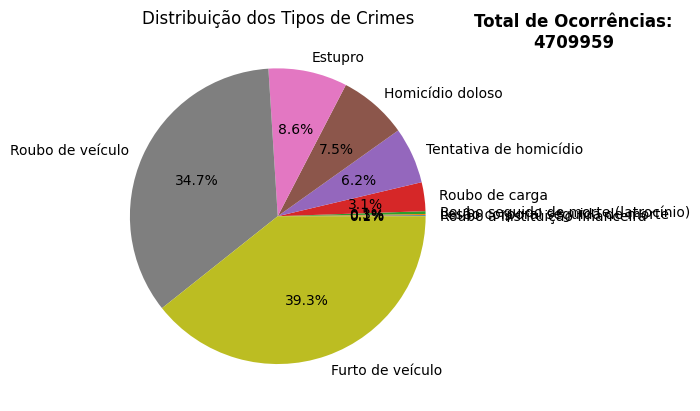

Tipo Crime
Roubo a instituição financeira            5300
Lesão corporal seguida de morte           6100
Roubo seguido de morte (latrocínio)      14263
Roubo de carga                          148301
Tentativa de homicídio                  289807
Homicídio doloso                        354868
Estupro                                 406461
Roubo de veículo                       1633162
Furto de veículo                       1851697
Name: Ocorrências, dtype: int64


In [ ]:
contagem_crimes = data.groupby('Tipo Crime')['Ocorrências'].sum().sort_values()

ax = contagem_crimes.plot(kind='pie', autopct='%1.1f%%')

total_ocorrencias = contagem_crimes.sum()
ax.text(2, 1.25, f'Total de Ocorrências:\n{total_ocorrencias}', ha='center', va='center', fontsize=12, weight='bold')

ax.set_aspect('equal')

plt.title('Distribuição dos Tipos de Crimes')

plt.ylabel('')
plt.show()
print(contagem_crimes)

agrupamento nos tipos de crime para classificações

In [ ]:

grupos_crime = {
    'Roubo a instituição financeira': 'Crime contra o patrimônio e roubo',
    'Roubo seguido de morte (latrocínio)': 'Crime contra o patrimônio e roubo',
    'Roubo de carga': 'Crime contra o patrimônio e roubo',
    'Roubo de veículo': 'Crime contra o patrimônio e roubo',
    'Furto de veículo': 'Crime contra o patrimônio e roubo',
    'Lesão corporal seguida de morte': 'Crime contra a vida',
    'Tentativa de homicídio': 'Crime contra a vida',
    'Homicídio doloso': 'Crime contra a vida',
    'Estupro': 'Crime sexual',
}

data['classe_crime'] = data['Tipo Crime'].map(grupos_crime)


classificação dos crimes

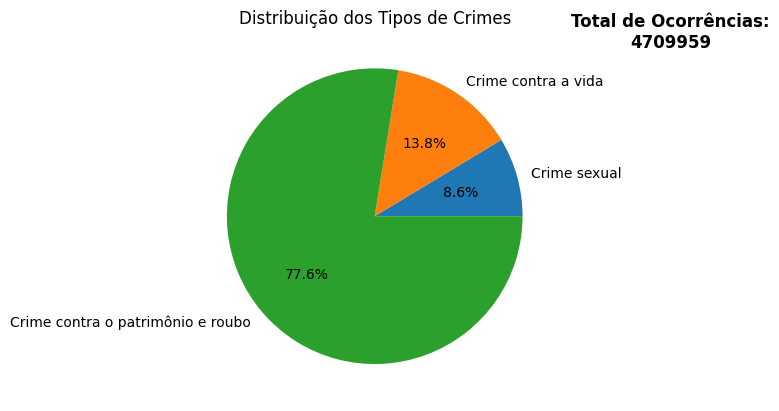

classe_crime
Crime sexual                          406461
Crime contra a vida                   650775
Crime contra o patrimônio e roubo    3652723
Name: Ocorrências, dtype: int64


In [ ]:
contagem_crimes = data.groupby('classe_crime')['Ocorrências'].sum().sort_values()

ax = contagem_crimes.plot(kind='pie', autopct='%1.1f%%')

total_ocorrencias = contagem_crimes.sum()
ax.text(2, 1.25, f'Total de Ocorrências:\n{total_ocorrencias}', ha='center', va='center', fontsize=12, weight='bold')

ax.set_aspect('equal')

plt.title('Distribuição dos Tipos de Crimes')

plt.ylabel('')
plt.show()
print(contagem_crimes)

Ocorrências por estados

siglas de estados para melhorar exibição dos dados

In [ ]:
siglas = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
data['sigla_UF'] = data['UF'].map(siglas)

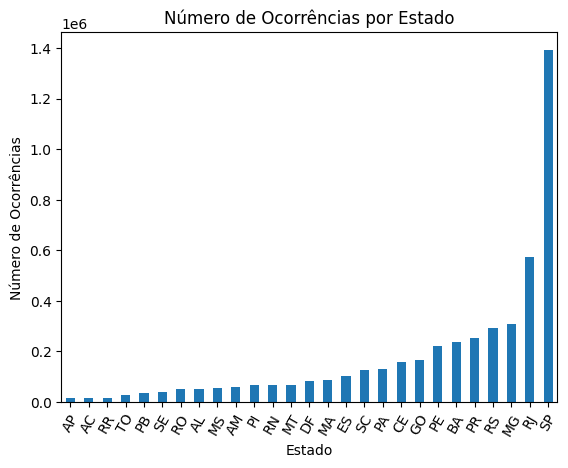

In [ ]:
data.groupby('sigla_UF')['Ocorrências'].sum().sort_values().plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Número de Ocorrências')
plt.title('Número de Ocorrências por Estado')
plt.xticks(rotation=60)
plt.show()

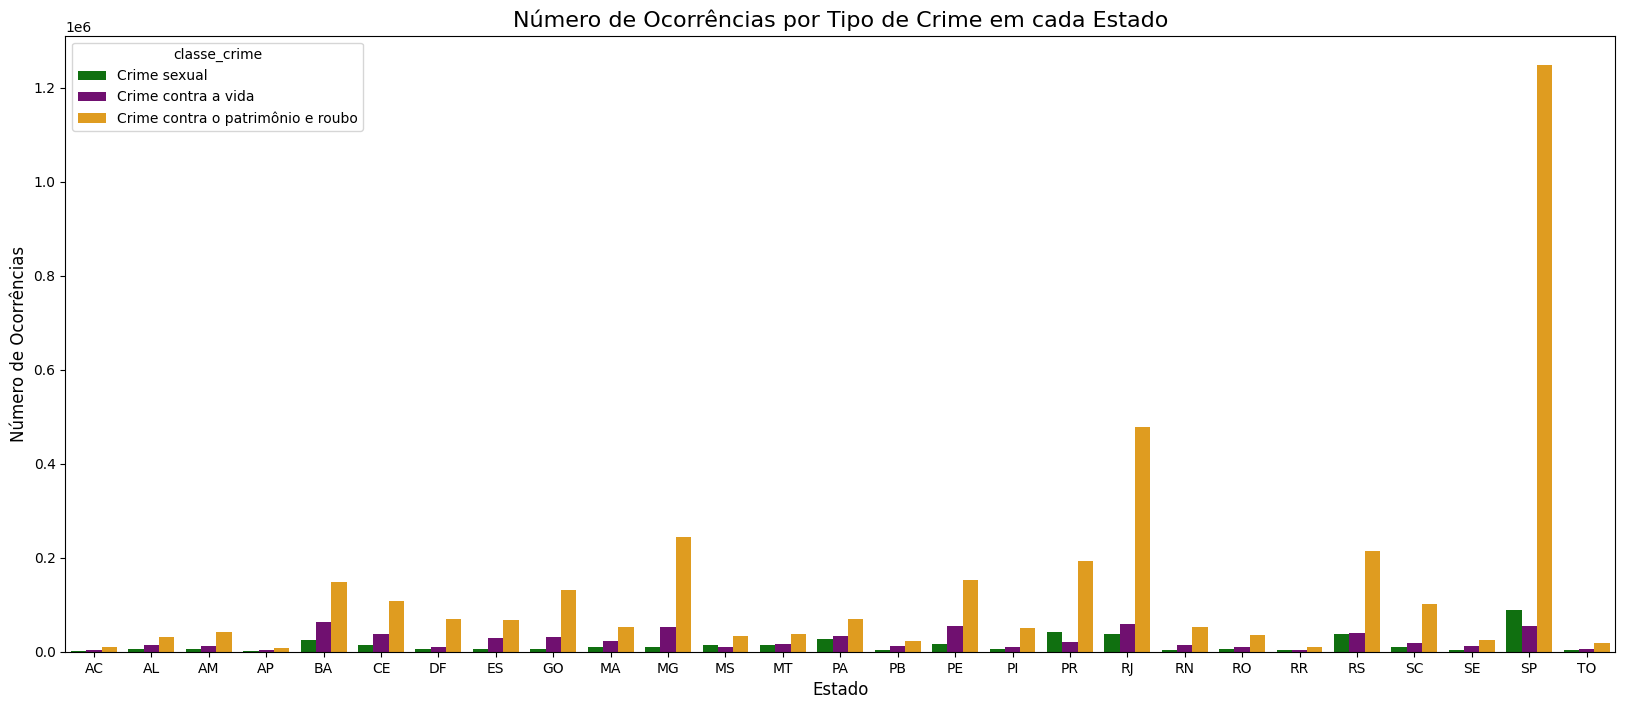

In [ ]:
cores = {'Crime contra o patrimônio e roubo': 'orange', 'Crime contra a vida': 'purple', 'Crime sexual': 'green'}
ordem_categorias = ['Crime sexual', 'Crime contra a vida', 'Crime contra o patrimônio e roubo']
data['classe_crime'] = data['classe_crime'].astype('category').cat.reorder_categories(ordem_categorias)
dados_grupo = data.groupby(['sigla_UF', 'classe_crime'])['Ocorrências'].sum().reset_index()

plt.figure(figsize=(20, 8))

fig = sns.barplot(x='sigla_UF', y='Ocorrências', hue='classe_crime', data=dados_grupo, palette=cores)

fig.set_title('Número de Ocorrências por Tipo de Crime em cada Estado', fontsize=16)
fig.set_xlabel('Estado', fontsize=12)
fig.set_ylabel('Número de Ocorrências', fontsize=12)
# fig.set_yscale('log')

plt.show()

#VISUALIZAÇÕES EM RELAÇÃO COM TEMPO

SAZONALIDADE no total de ocorrencias entre 2015 e 2022

In [ ]:
total_ocorrencias = data.groupby("data")["Ocorrências"].sum().reset_index()
total_ocorrencias['media_movel'] = total_ocorrencias['Ocorrências'].rolling(10).mean()
total_ocorrencias

,data,Ocorrências,media_movel
0,2015-01-01,59205,NaN
1,2015-02-01,52346,NaN
2,2015-03-01,58538,NaN
3,2015-04-01,55014,NaN
4,2015-05-01,54406,NaN
...,...,...,...
91,2022-08-01,41549,40462.7
92,2022-09-01,42993,40738.4
93,2022-10-01,45357,41278.6
94,2022-11-01,45101,41984.2


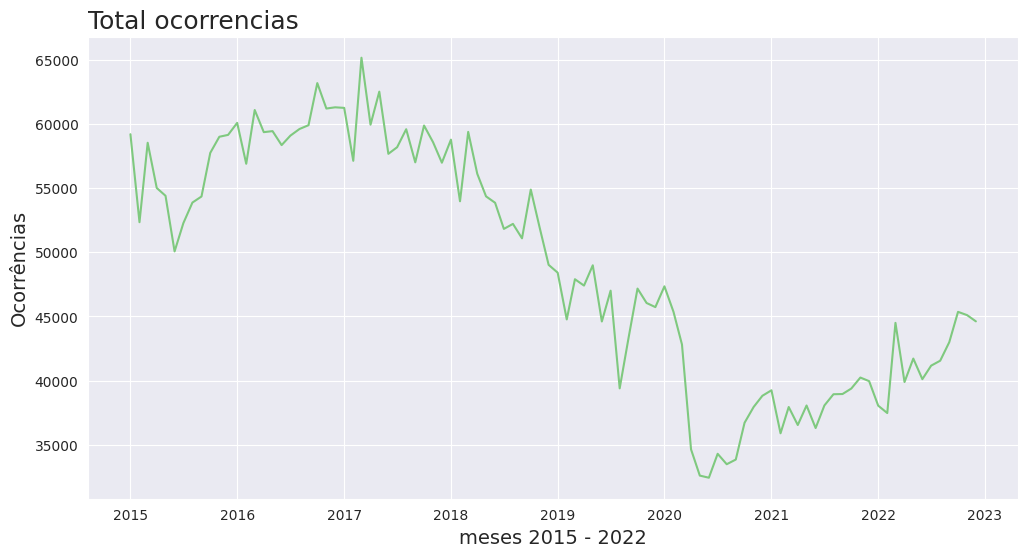

In [ ]:
plotar('Total ocorrencias', 'meses 2015 - 2022', 'Ocorrências','data','Ocorrências', total_ocorrencias)

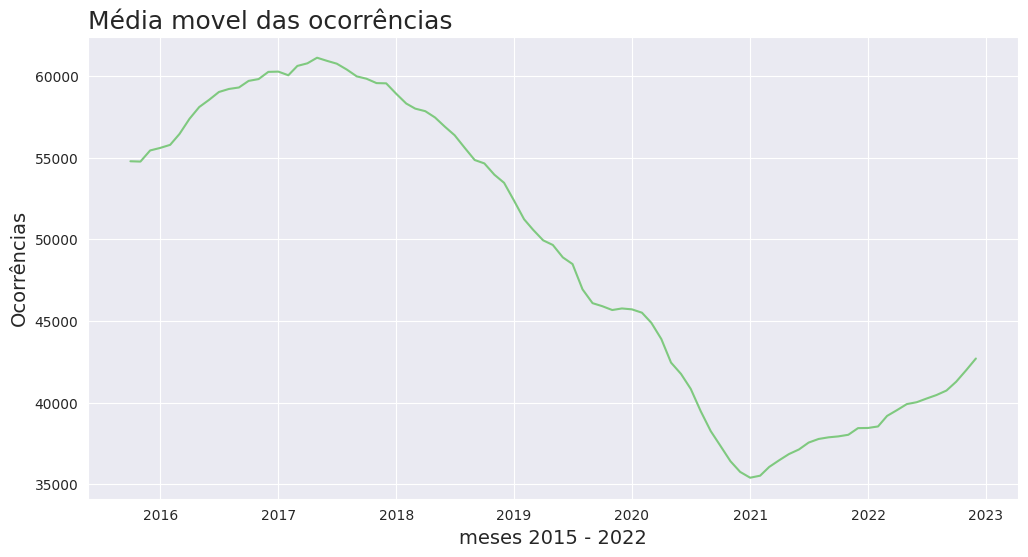

In [ ]:
plotar('Média movel das ocorrências', 'meses 2015 - 2022', 'Ocorrências','data','media_movel', total_ocorrencias)

meses

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
def plotar_decompose(result):
  #Plotar em tamanho maior
  fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
  result.observed.plot(ax=ax1)
  result.trend.plot(ax=ax2)
  result.seasonal.plot(ax=ax3)
  result.resid.plot(ax=ax4)
  plt.tight_layout()

In [ ]:
a = total_ocorrencias.set_index("data")
result_decompose = seasonal_decompose(a['Ocorrências'])

OBJETO OBSERVADO, TENDENCIA, SAZONAL E RESÍDUO no total de ocorrencias

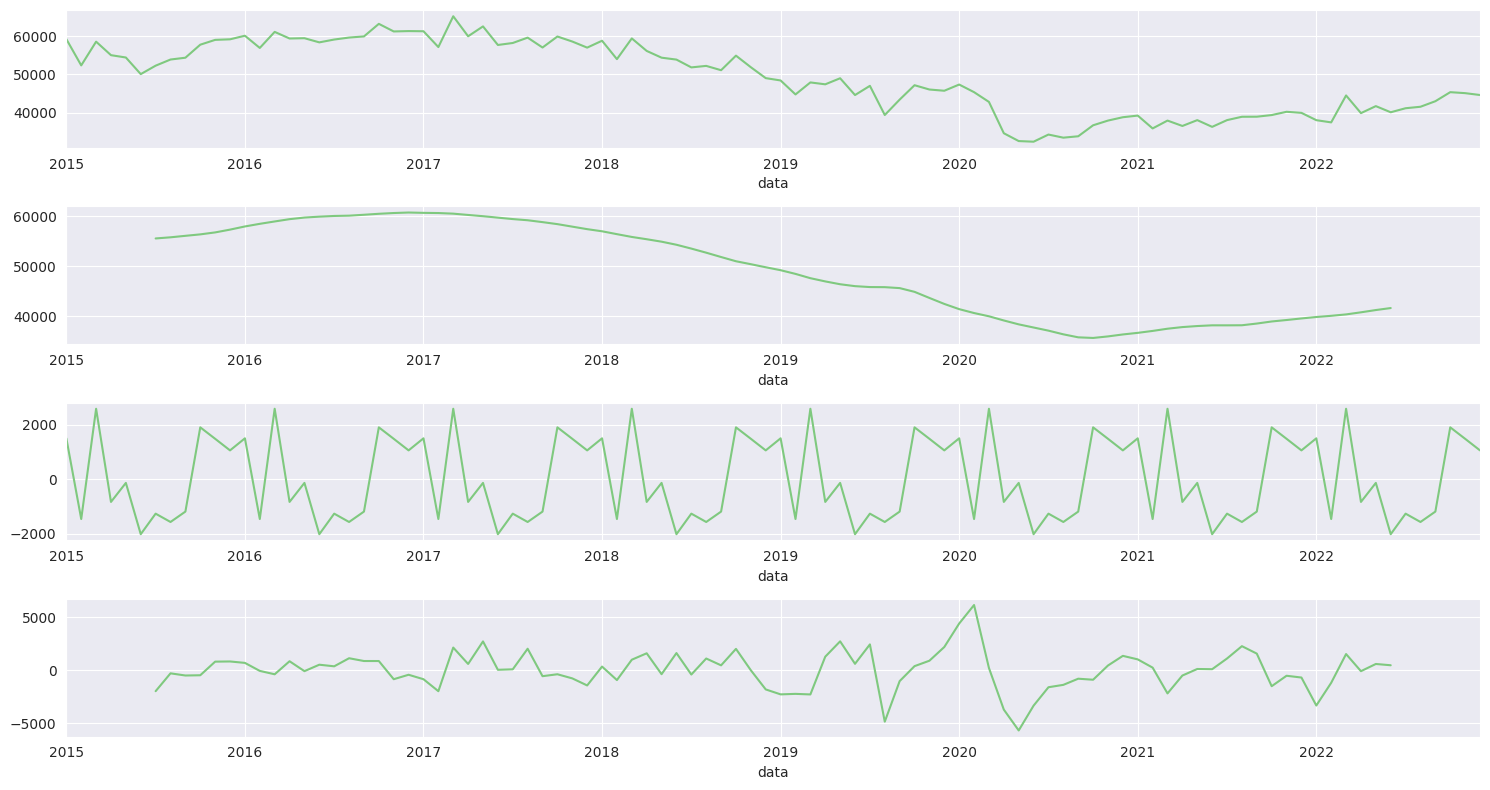

In [ ]:
#OCORRENCIAS CRIMINAIS
plotar_decompose(result_decompose)

VISUALIZAÇÃO DE OCORRÊNCIAS POR ESTADO

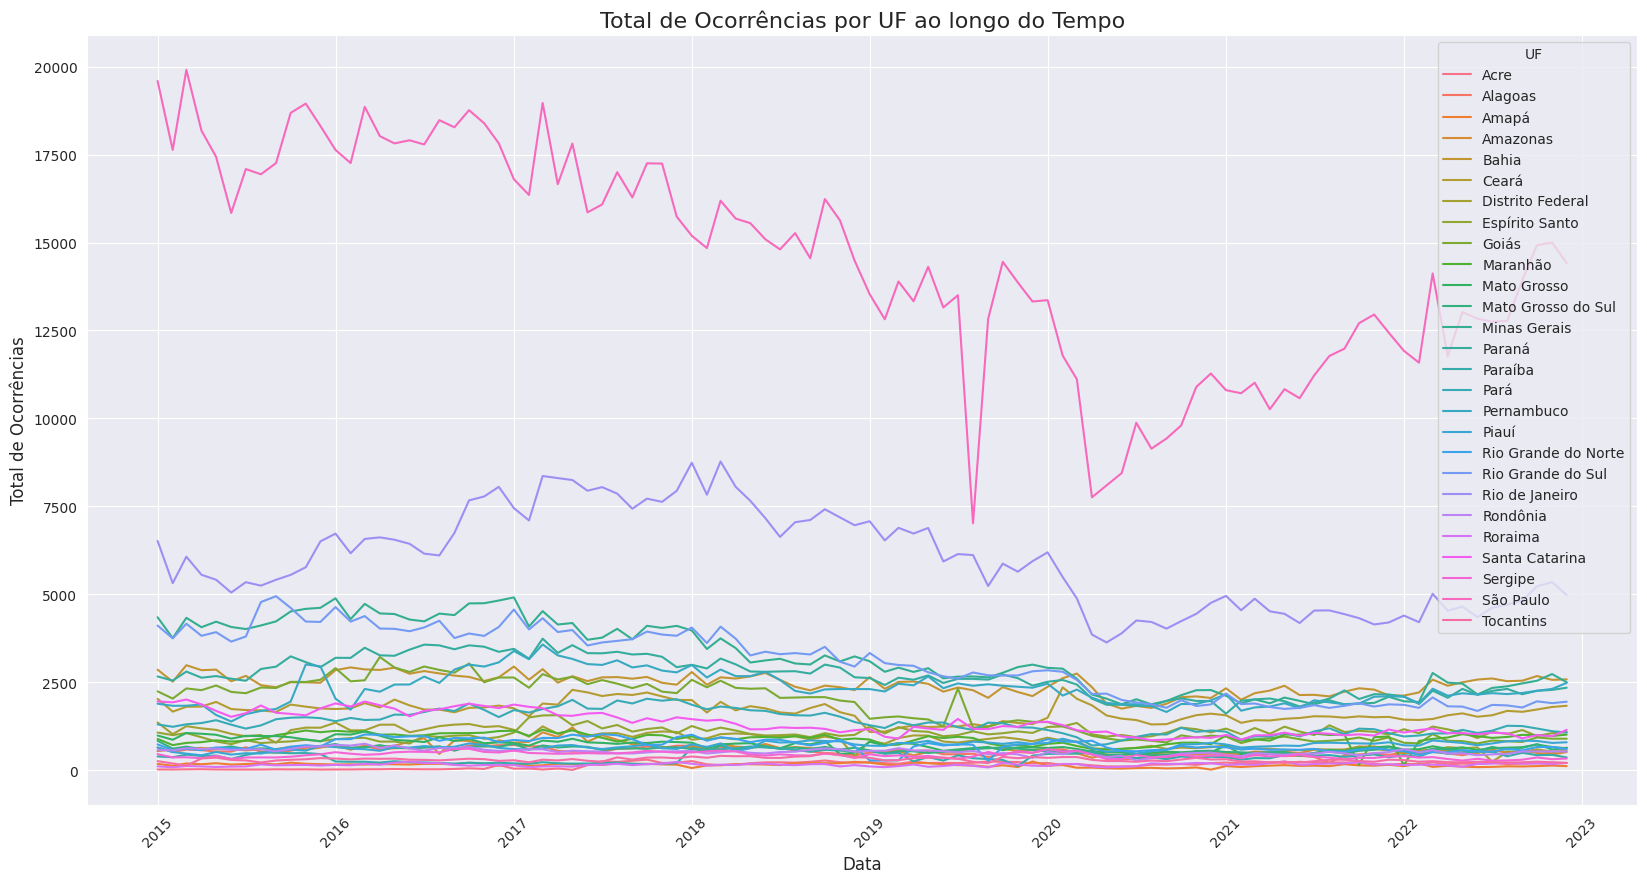

In [ ]:
ocorrencias_estados = data.groupby(['UF', 'data'])['Ocorrências'].sum().reset_index()
plt.figure(figsize=(20, 10))

fig = sns.lineplot(x='data', y='Ocorrências', hue='UF', data=ocorrencias_estados)

fig.set_title('Total de Ocorrências por UF ao longo do Tempo', fontsize=16)
fig.set_xlabel('Data', fontsize=12)
fig.set_ylabel('Total de Ocorrências', fontsize=12)
# fig.set_yscale('log')
plt.xticks(rotation=45)

plt.show()

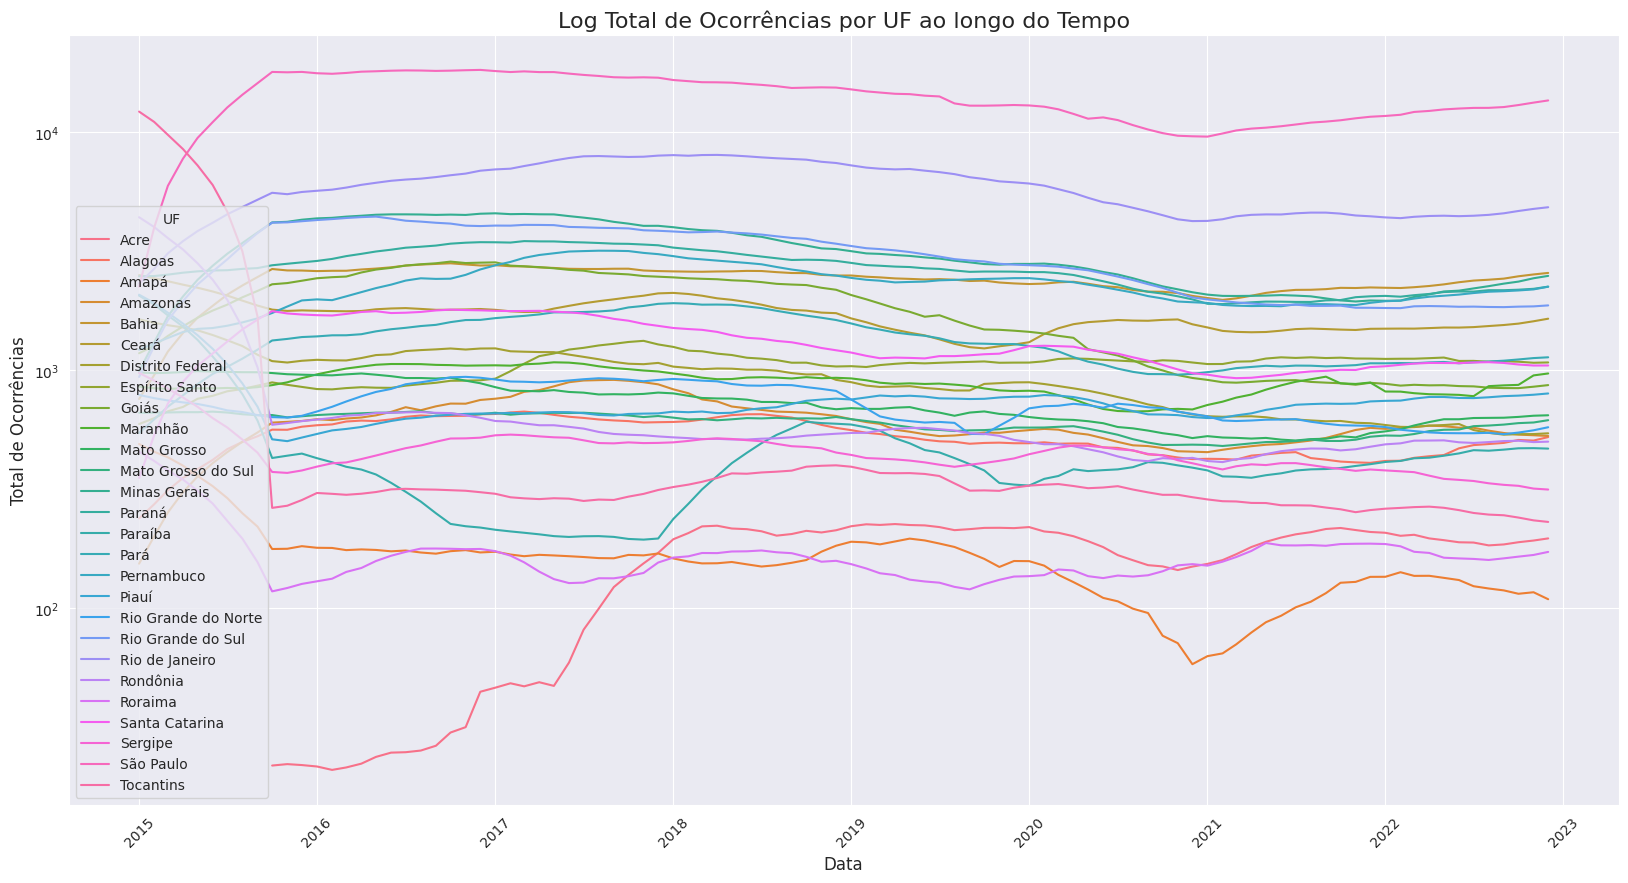

In [ ]:
#melhoria na visualização e compreenção dos dados
ocorrencias_estados = data.groupby(['UF', 'data'])['Ocorrências'].sum().rolling(10).mean().reset_index()
plt.figure(figsize=(20, 10))

fig = sns.lineplot(x='data', y='Ocorrências', hue='UF', data=ocorrencias_estados)

fig.set_title('Log Total de Ocorrências por UF ao longo do Tempo', fontsize=16)
fig.set_xlabel('Data', fontsize=12)
fig.set_ylabel('Total de Ocorrências', fontsize=12)
fig.set_yscale('log')
plt.xticks(rotation=45)

plt.show()

VARIAÇÃO DE OCORRÊNCIA NOS TIPOS DE CRIME

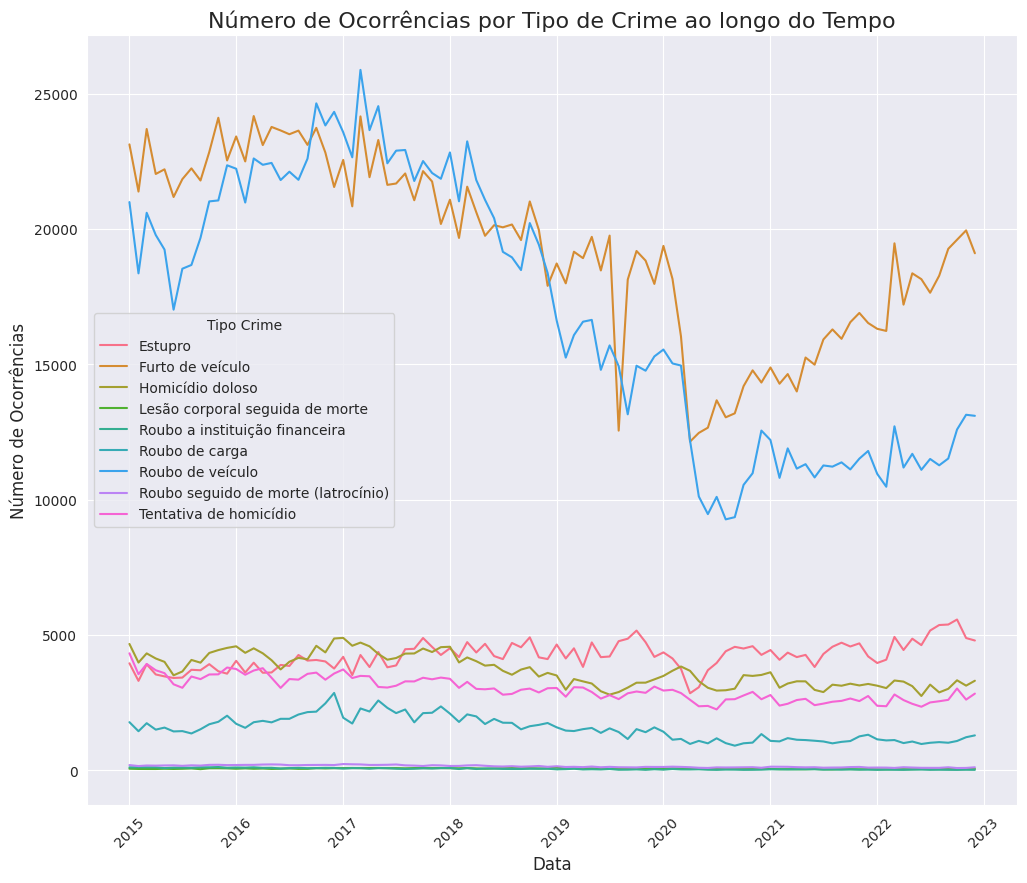

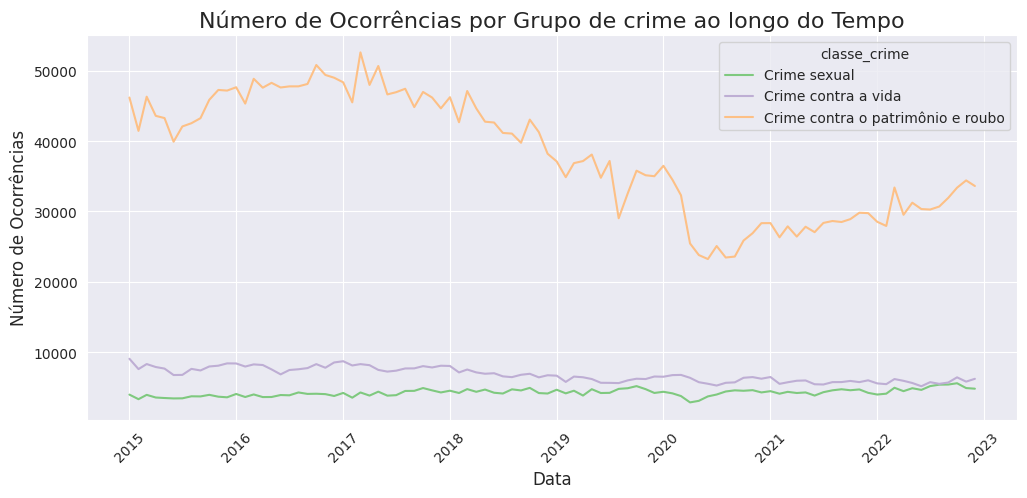

In [ ]:

dados_periodo = data.groupby(['Tipo Crime', 'data'])['Ocorrências'].sum().rolling(1).mean().reset_index()
plt.figure(figsize=(12, 10))
fig = sns.lineplot(x='data', y='Ocorrências', hue='Tipo Crime', data=dados_periodo)

fig.set_title('Número de Ocorrências por Tipo de Crime ao longo do Tempo', fontsize=16)
fig.set_xlabel('Data', fontsize=12)
fig.set_ylabel('Número de Ocorrências', fontsize=12)
# fig.set_yscale('log')
plt.xticks(rotation=45)
plt.show()

dados_periodo = data.groupby(['classe_crime', 'data'])['Ocorrências'].sum().rolling(1).mean().reset_index()


plt.figure(figsize=(12, 5))
fig = sns.lineplot(x='data', y='Ocorrências', hue='classe_crime', data=dados_periodo)

fig.set_title('Número de Ocorrências por Grupo de crime ao longo do Tempo', fontsize=16)
fig.set_xlabel('Data', fontsize=12)
fig.set_ylabel('Número de Ocorrências', fontsize=12)
# fig.set_yscale('log')
plt.xticks(rotation=45)
plt.show()



#PREVISÃO DOS DADOS COM PROPHET

In [ ]:
from sklearn import metrics
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

In [ ]:
analise_ocorrencias = total_ocorrencias
analise_ocorrencias['ds'] = analise_ocorrencias['data']
analise_ocorrencias['y'] = analise_ocorrencias['Ocorrências']
analise_ocorrencias = analise_ocorrencias.drop(['data', 'Ocorrências','media_movel'], axis=1)
# analise_ocorrencias.set_index('ds', inplace=True)
# analise_ocorrencias = analise_ocorrencias.resample('m').sum()
# analise_ocorrencias.reset_index(inplace=True)

In [38]:
train_set = analise_ocorrencias.iloc[:-6]
test_set = analise_ocorrencias.iloc[-6:]
#6

In [39]:
train_set

,ds,y
0,2015-01-01,59205
1,2015-02-01,52346
2,2015-03-01,58538
3,2015-04-01,55014
4,2015-05-01,54406
...,...,...
85,2022-02-01,37468
86,2022-03-01,44499
87,2022-04-01,39887
88,2022-05-01,41715


In [40]:
test_set


,ds,y
90,2022-07-01,41163
91,2022-08-01,41549
92,2022-09-01,42993
93,2022-10-01,45357
94,2022-11-01,45101
95,2022-12-01,44616


In [41]:
model = Prophet()

In [42]:
y_pred = model.fit(train_set)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3sw3w1aj/vwnedv5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3sw3w1aj/n7h8ef17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68841', 'data', 'file=/tmp/tmp3sw3w1aj/vwnedv5_.json', 'init=/tmp/tmp3sw3w1aj/n7h8ef17.json', 'output', 'file=/tmp/tmp3sw3w1aj/prophet_modelob2fyc2u/prophet_model-20230618235618.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:56:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:56:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
y_pred = model.predict(test_set)
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-01,40644.684641,36705.794586,41387.107850,40636.952495,40649.783599,-1510.754522,-1510.754522,-1510.754522,-1510.754522,-1510.754522,-1510.754522,0.0,0.0,0.0,39133.930120
1,2022-08-01,40818.057643,36289.538677,40938.048447,40769.451377,40865.550637,-2290.850428,-2290.850428,-2290.850428,-2290.850428,-2290.850428,-2290.850428,0.0,0.0,0.0,38527.207214
2,2022-09-01,40991.430644,37064.391482,42077.063204,40874.545335,41111.115408,-1448.200919,-1448.200919,-1448.200919,-1448.200919,-1448.200919,-1448.200919,0.0,0.0,0.0,39543.229725
3,2022-10-01,41159.210968,40631.063929,45294.836120,40939.324258,41375.100996,1812.980591,1812.980591,1812.980591,1812.980591,1812.980591,1812.980591,0.0,0.0,0.0,42972.191560
4,2022-11-01,41332.583970,40107.875947,44993.067791,40991.790174,41645.597561,1333.302314,1333.302314,1333.302314,1333.302314,1333.302314,1333.302314,0.0,0.0,0.0,42665.886284
5,2022-12-01,41500.364294,39713.858531,44479.995298,41034.482356,41937.706182,728.964500,728.964500,728.964500,728.964500,728.964500,728.964500,0.0,0.0,0.0,42229.328794


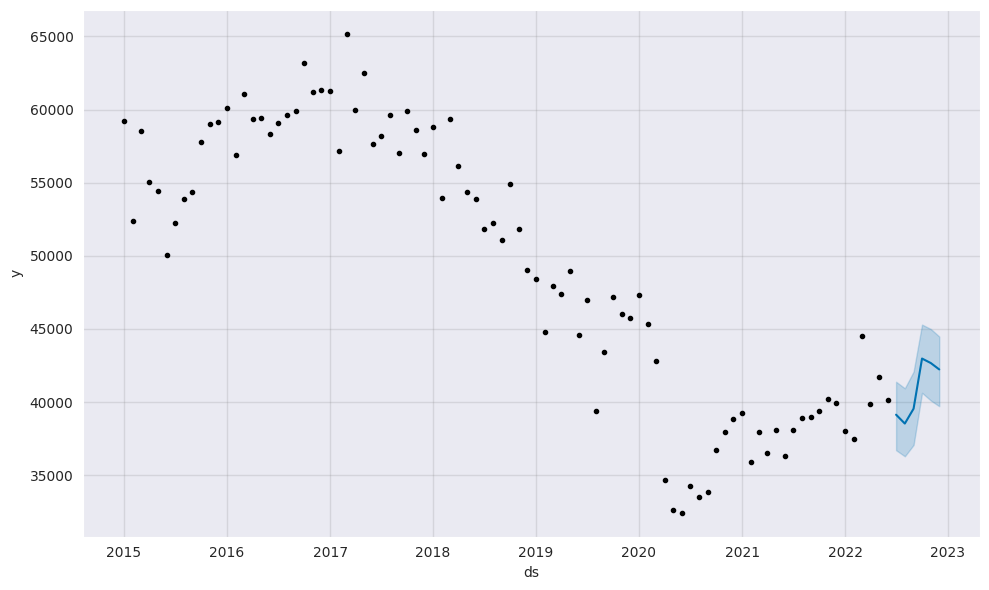

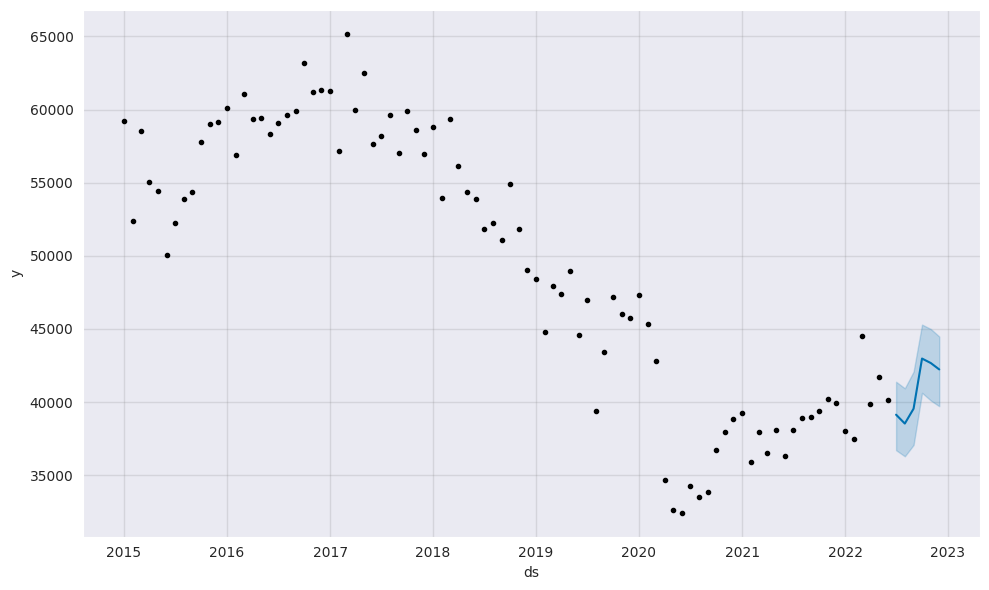

In [44]:
model.plot(y_pred)

<Axes: xlabel='ds'>

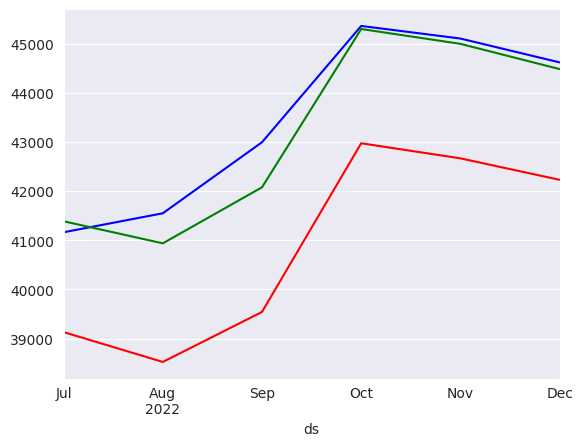

In [45]:
test_set.set_index('ds')['y'].plot(color='blue')
y_pred.set_index('ds')['yhat_upper'].plot(color='green')
y_pred.set_index('ds')['yhat'].plot(color='red')

utilizando até 2021 como treino

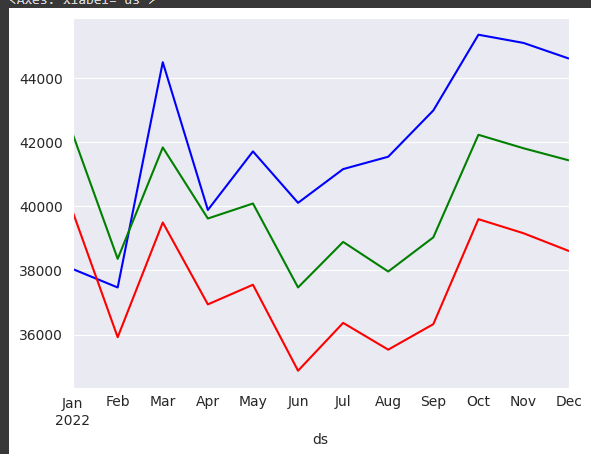




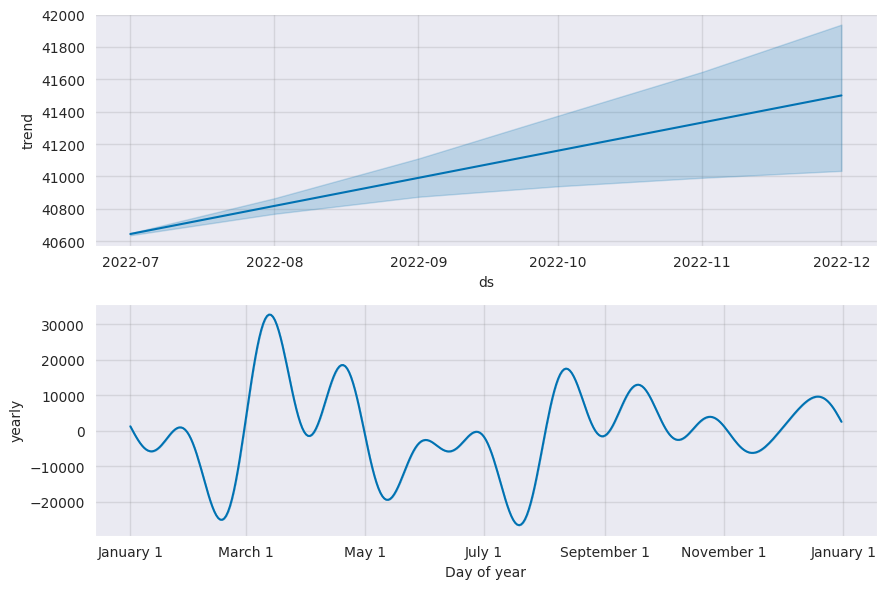

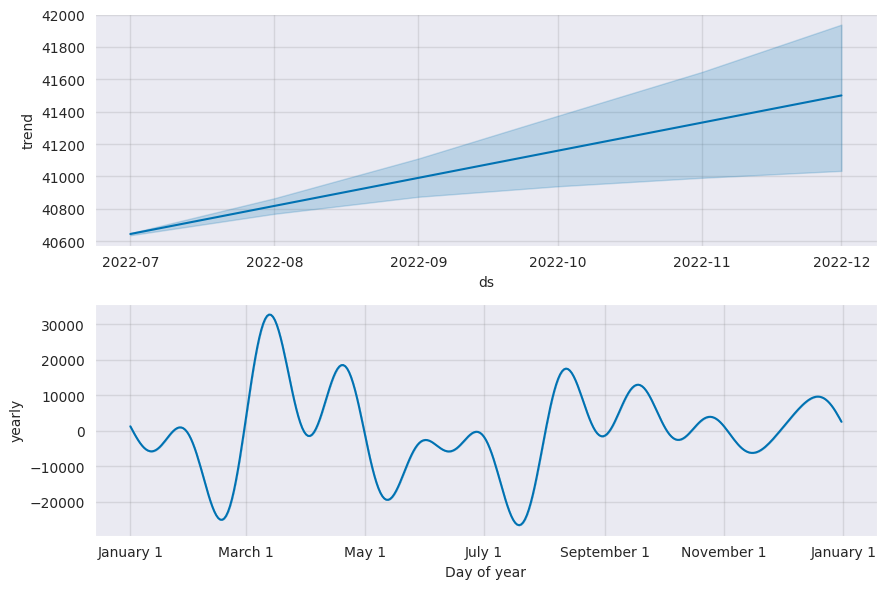

In [46]:
model.plot_components(y_pred)

Previsão até 2026

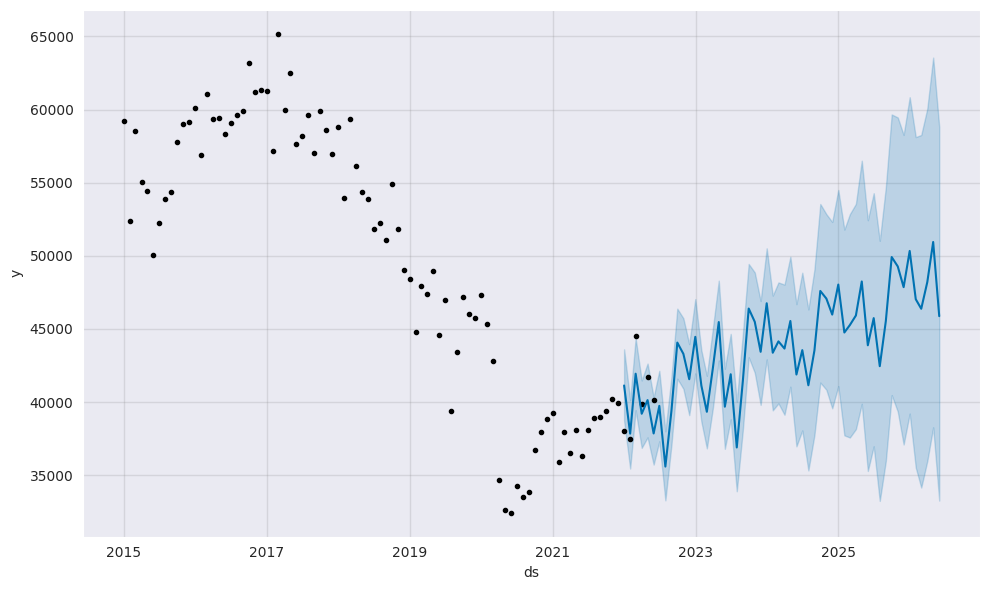

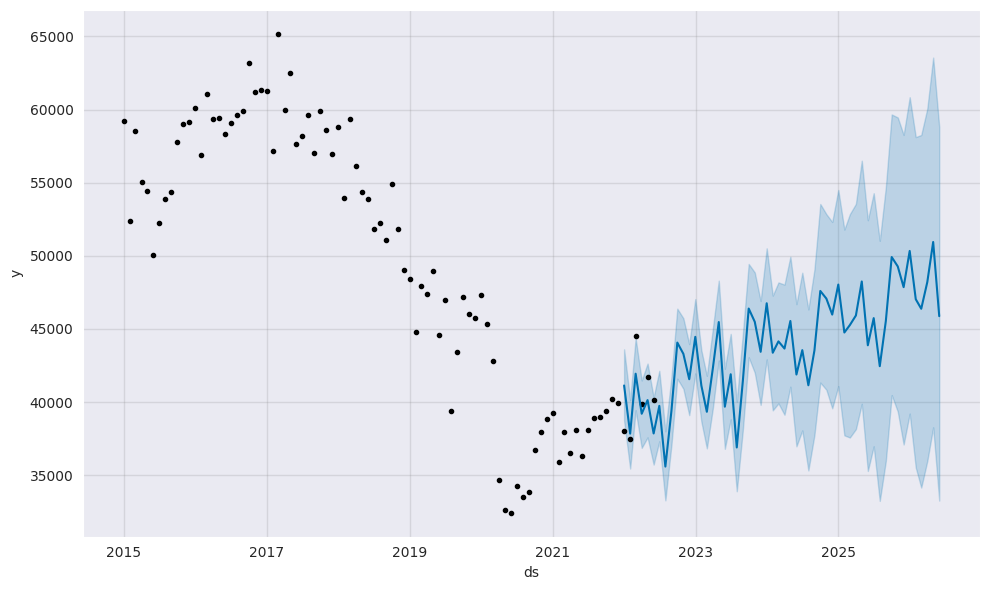

In [47]:
#período de previsão até 2030 com base em train set
future = model.make_future_dataframe(periods=48, freq='M')

previsao_2035 = model.predict(future)

# Extraindo as previsões para o período estendido (2022-2024)
previsao_2035 = previsao_2035[previsao_2035['ds'].dt.year >= 2022]
model.plot(previsao_2035)


#ATUALIZAÇÕES

previsão aplicada a sergipe

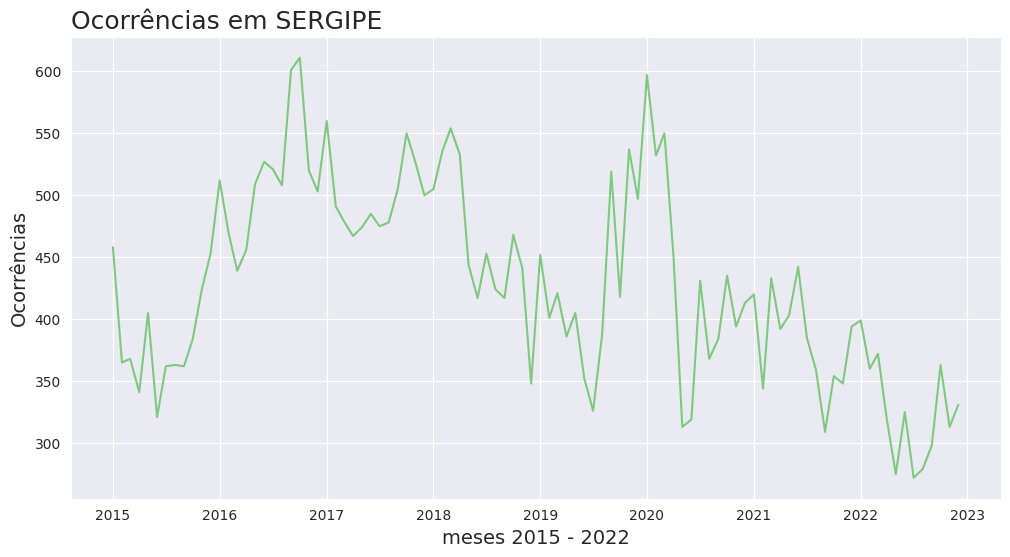

In [55]:
grupo_se = data[data['sigla_UF'] == 'SE']
ocorrencias_se = grupo_se.groupby(['data'])['Ocorrências'].sum().reset_index()
ocorrencias_se['ds'] = ocorrencias_se['data']
ocorrencias_se['y'] = ocorrencias_se['Ocorrências']
ocorrencias_se = ocorrencias_se.drop(['data', 'Ocorrências'], axis=1)
plotar('Ocorrências em SERGIPE', 'meses 2015 - 2022', 'Ocorrências','ds','y', ocorrencias_se)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3sw3w1aj/msum9upz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3sw3w1aj/3yu7gwpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38247', 'data', 'file=/tmp/tmp3sw3w1aj/msum9upz.json', 'init=/tmp/tmp3sw3w1aj/3yu7gwpt.json', 'output', 'file=/tmp/tmp3sw3w1aj/prophet_modeldqsfmuez/prophet_model-20230619000753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:07:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:07:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Text(0.5, 1.0, 'Previsão de 2022 em sergipe')

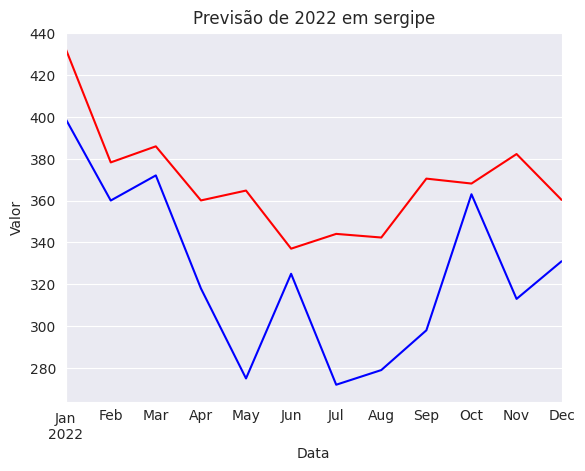

In [60]:
train_set = ocorrencias_se.iloc[:-12]
test_set = ocorrencias_se.iloc[-12:]
model = Prophet()
y_pred = model.fit(train_set)
y_pred = model.predict(test_set)
test_set.set_index('ds')['y'].plot(color='blue', )
y_pred.set_index('ds')['yhat'].plot(color='red')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsão de 2022 em sergipe')

In [ ]:
train_set = analise_ocorrencias.iloc[:-6]
test_set = analise_ocorrencias.iloc[-6:]

análises por região.

In [48]:
regioes = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}
data['Região'] = data['sigla_UF'].map(regioes)
data

,UF,Tipo Crime,Ano,Mês,Ocorrências,data,classe_crime,sigla_UF,Região
0,Acre,Estupro,2022,01,31,2022-01-01,Crime sexual,AC,Norte
1,Acre,Furto de veículo,2022,01,50,2022-01-01,Crime contra o patrimônio e roubo,AC,Norte
2,Acre,Homicídio doloso,2022,01,10,2022-01-01,Crime contra a vida,AC,Norte
3,Acre,Lesão corporal seguida de morte,2022,01,1,2022-01-01,Crime contra a vida,AC,Norte
4,Acre,Roubo a instituição financeira,2022,01,0,2022-01-01,Crime contra o patrimônio e roubo,AC,Norte
...,...,...,...,...,...,...,...,...,...
23015,Tocantins,Roubo a instituição financeira,2015,12,6,2015-12-01,Crime contra o patrimônio e roubo,TO,Norte
23016,Tocantins,Roubo de carga,2015,12,1,2015-12-01,Crime contra o patrimônio e roubo,TO,Norte
23017,Tocantins,Roubo de veículo,2015,12,55,2015-12-01,Crime contra o patrimônio e roubo,TO,Norte
23018,Tocantins,Roubo seguido de morte (latrocínio),2015,12,2,2015-12-01,Crime contra o patrimônio e roubo,TO,Norte


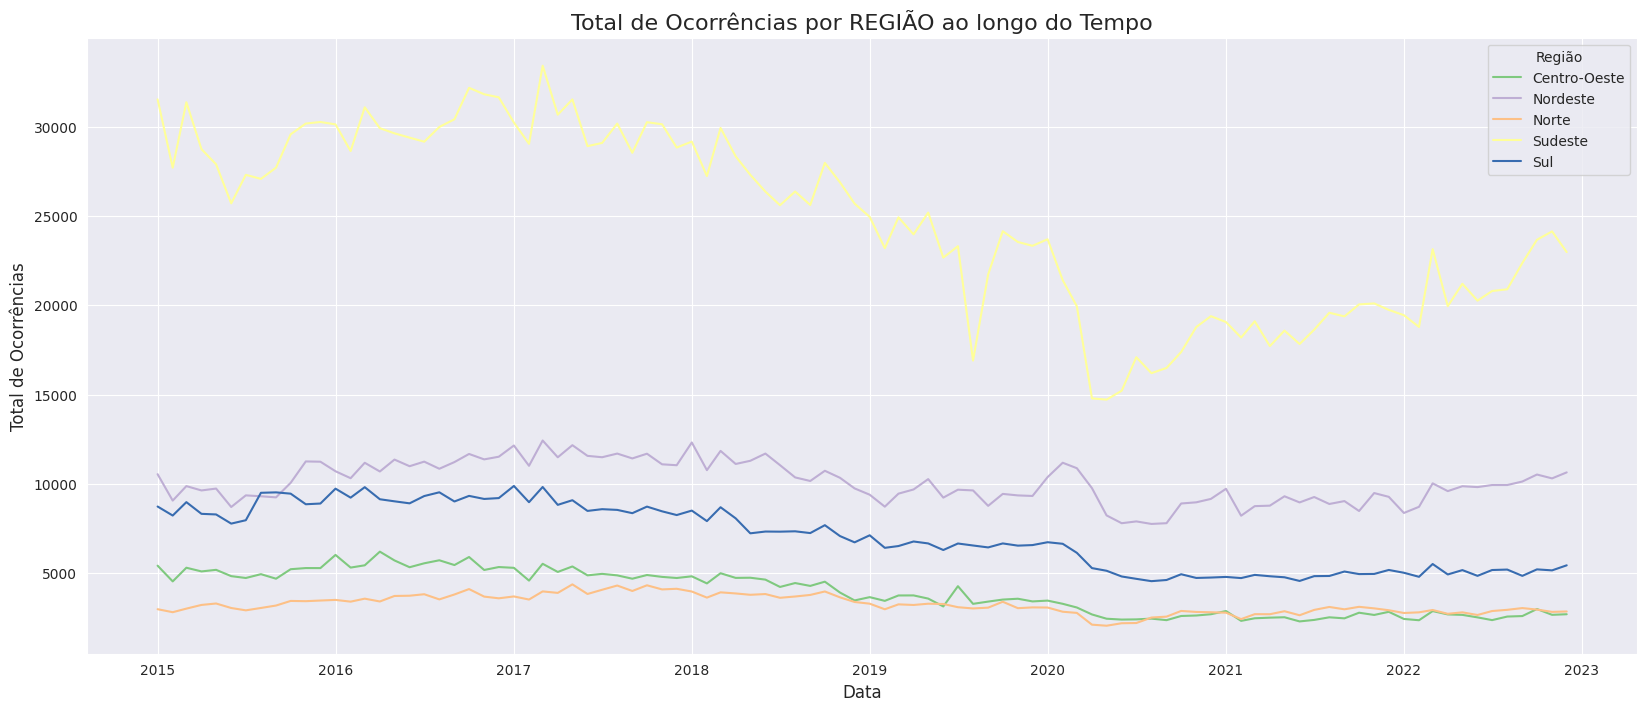

In [49]:
ocorrencias_estados = data.groupby(['Região', 'data'])['Ocorrências'].sum().reset_index()
plt.figure(figsize=(20, 8))

fig = sns.lineplot(x='data', y='Ocorrências', hue='Região', data=ocorrencias_estados)

fig.set_title('Total de Ocorrências por REGIÃO ao longo do Tempo', fontsize=16)
fig.set_xlabel('Data', fontsize=12)
fig.set_ylabel('Total de Ocorrências', fontsize=12)
# plt.xticks(rotation=45)

plt.show()

* COLUNA ESQUERDA = resultado do treino onde a linha vermelha representa a previsão

* COLUNA DIREITA = Previsão em 3 anos no futuro

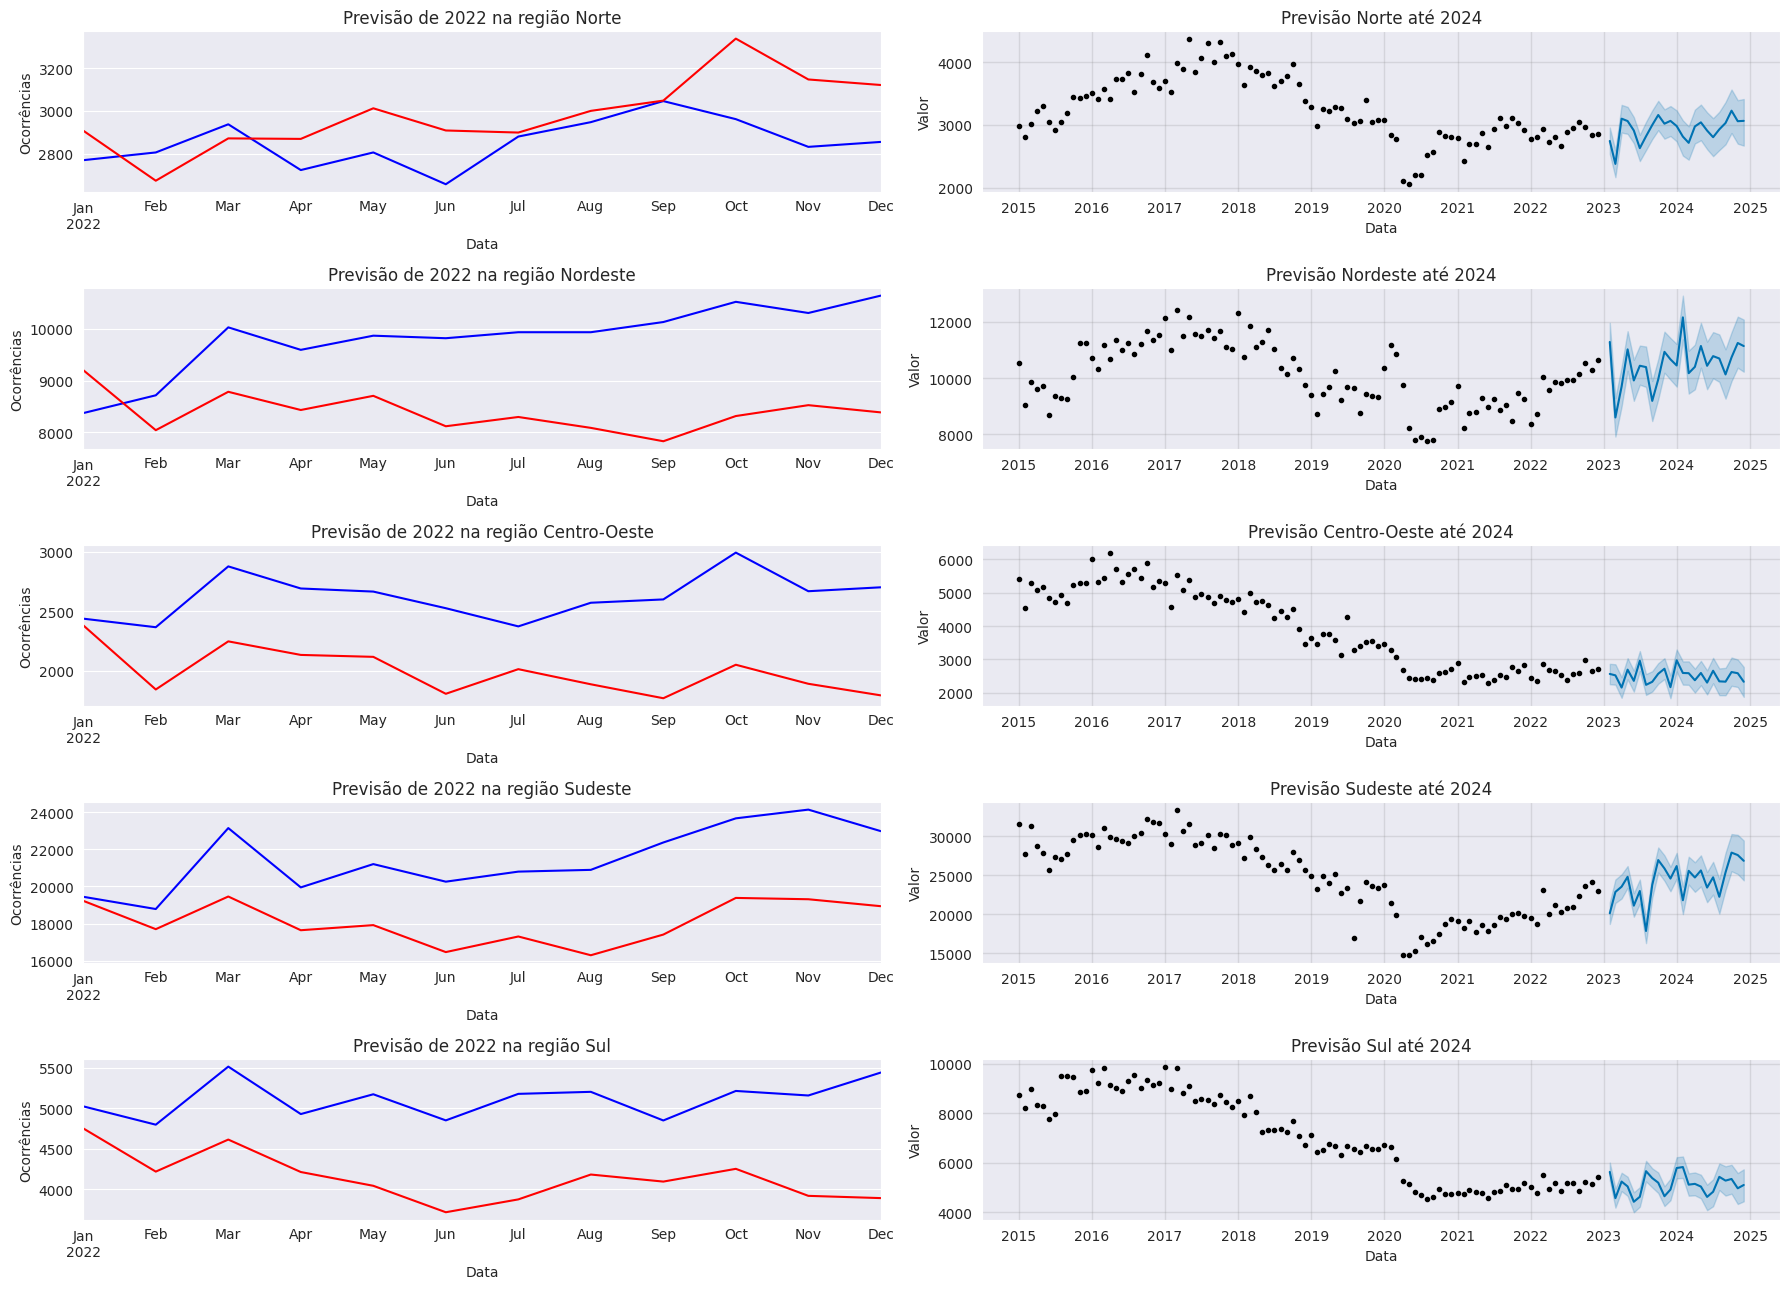

In [91]:
import matplotlib.pyplot as plt

regiões = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
num_rows = len(regiões)  # Número de linhas para os subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(18, num_rows * 2.6))

for i, a in enumerate(regiões):
    ocorrencias = ocorrencias_estados[ocorrencias_estados['Região'] == a].groupby(['data'])['Ocorrências'].sum().reset_index()
    ocorrencias['ds'] = ocorrencias['data']
    ocorrencias['y'] = ocorrencias['Ocorrências']
    ocorrencias = ocorrencias.drop(['data', 'Ocorrências'], axis=1)
    train_set = ocorrencias.iloc[:-12]
    test_set = ocorrencias.iloc[-12:]
    model = Prophet()
    y_pred = model.fit(train_set)
    y_pred = model.predict(test_set)

    # Subplot para o gráfico de ocorrências na coluna 1
    ax1 = axes[i, 0]
    test_set.set_index('ds')['y'].plot(color='blue', ax=ax1)
    y_pred.set_index('ds')['yhat'].plot(color='red', ax=ax1)
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Ocorrências')
    ax1.set_title(f'Previsão de 2022 na região {a}')

    # Subplot para o gráfico da coluna 2
    ax2 = axes[i, 1]
    model = Prophet().fit(ocorrencias)
    future = model.make_future_dataframe(periods=24, freq='M')
    previsao_2035 = model.predict(future)
    previsao_2035 = previsao_2035[previsao_2035['ds'].dt.year > 2022]
    model.plot(previsao_2035, ax=ax2)
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Valor')
    ax2.set_title(f'Previsão {a} até 2024')

plt.tight_layout()
plt.show()

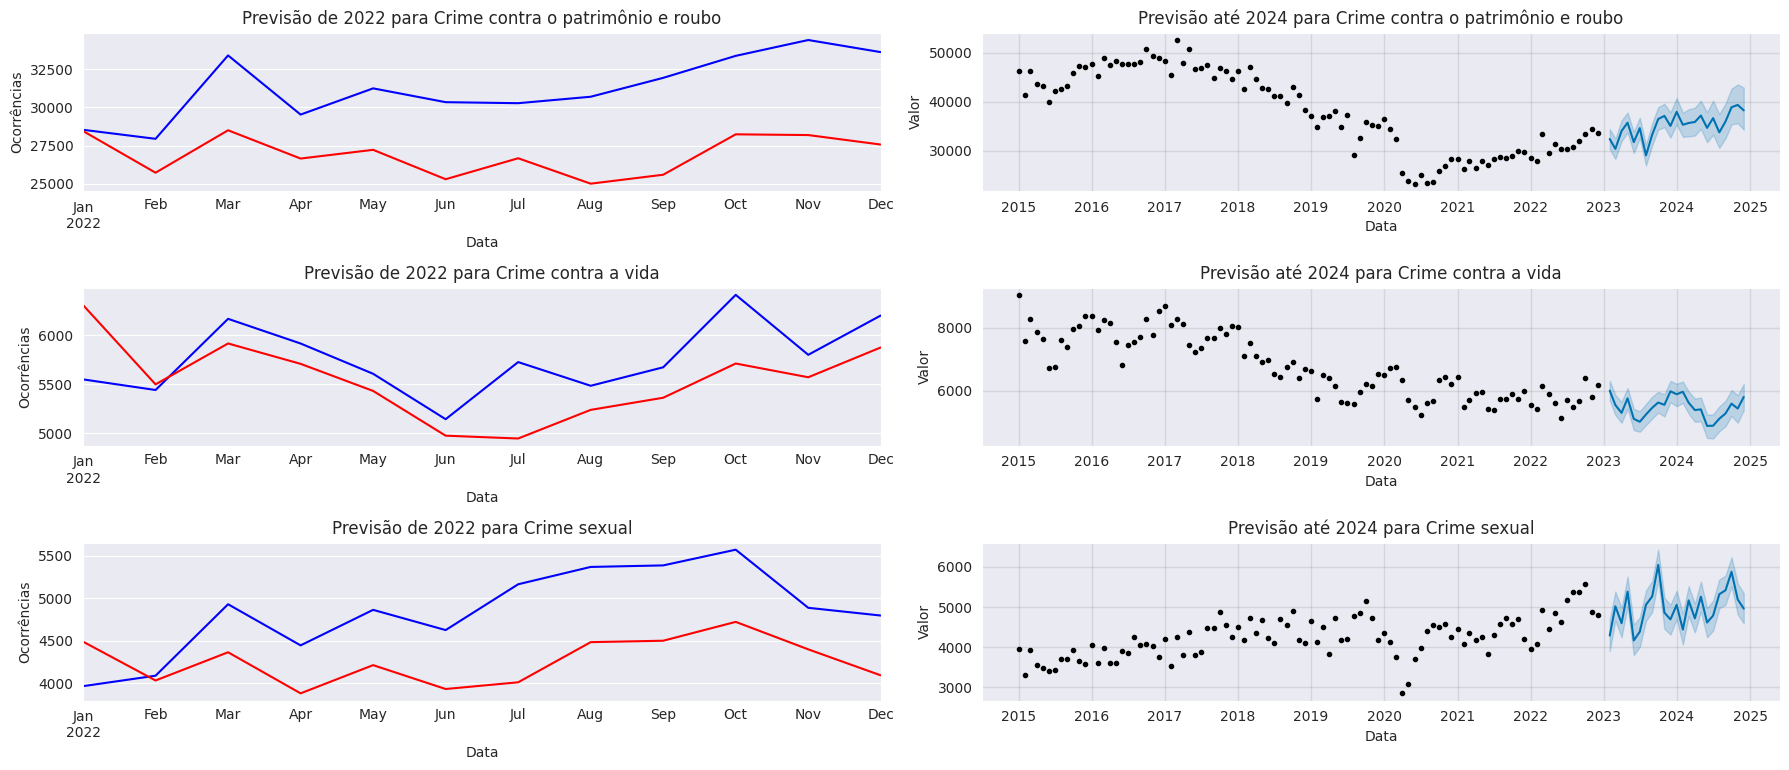

In [92]:
classes_crime = ['Crime contra o patrimônio e roubo', 'Crime contra a vida', 'Crime sexual']

num_rows = len(classes_crime)  # Número de linhas para os subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(18, num_rows * 2.6))

for i, classe in enumerate(classes_crime):
    ocorrencias = dados_periodo[dados_periodo['classe_crime'] == classe].groupby(['data'])['Ocorrências'].sum().reset_index()
    ocorrencias['ds'] = ocorrencias['data']
    ocorrencias['y'] = ocorrencias['Ocorrências']
    ocorrencias = ocorrencias.drop(['data', 'Ocorrências'], axis=1)
    train_set = ocorrencias.iloc[:-12]
    test_set = ocorrencias.iloc[-12:]
    model = Prophet()
    y_pred = model.fit(train_set)
    y_pred = model.predict(test_set)

    # Subplot para o gráfico de ocorrências na coluna 1
    ax1 = axes[i, 0]
    test_set.set_index('ds')['y'].plot(color='blue', ax=ax1)
    y_pred.set_index('ds')['yhat'].plot(color='red', ax=ax1)
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Ocorrências')
    ax1.set_title(f'Previsão de 2022 para {classe}')

    # Subplot para o gráfico da coluna 2
    ax2 = axes[i, 1]
    model = Prophet().fit(ocorrencias)
    future = model.make_future_dataframe(periods=24, freq='M')
    previsao_2024 = model.predict(future)
    previsao_2024 = previsao_2024[previsao_2024['ds'].dt.year > 2022]
    model.plot(previsao_2024, ax=ax2)
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Valor')
    ax2.set_title(f'Previsão até 2024 para {classe}')

plt.tight_layout()
plt.show()
